In [1]:
import numpy as np
import pandas as pd

import pickle

import scipy
import scipy.sparse as sp

import scripts.training.Dataset_split as spl

from datetime import datetime

In [2]:
PROJECT_FOLDER = "../.."
INPUT_DATA_FOLDER = "data/final_data"
MODEL_FOLDER = "model"
FINAL_TRAIN_MATRIX = "final_train_matrix_v1.pkl"
FINAL_DATETIMES = "final_datetimes_v1"
FINAL_Y = "final_y_v1"
TUNING_FOLDER = f"{MODEL_FOLDER}/tuning"

In [3]:
X = pickle.load(open(f"{PROJECT_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_TRAIN_MATRIX}", "rb"))
X

<191715x9026 sparse matrix of type '<class 'numpy.float64'>'
	with 129877897 stored elements in Compressed Sparse Row format>

In [4]:
y = pickle.load(open(f"{PROJECT_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_Y}.pkl", "rb"))
y

0         0
167500    0
159608    0
151693    0
143371    0
         ..
135512    0
119083    0
51952     0
16353     0
191714    0
Name: is_alarm, Length: 191715, dtype: int64

In [5]:
df_dt = pickle.load(open(f"{PROJECT_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_DATETIMES}.pkl", "rb"))

In [6]:
print(df_dt.head(30))

                  datetime
0      2022-02-26 00:00:00
167500 2022-02-26 00:00:00
159608 2022-02-26 00:00:00
151693 2022-02-26 00:00:00
143371 2022-02-26 00:00:00
135513 2022-02-26 00:00:00
7906   2022-02-26 00:00:00
126982 2022-02-26 00:00:00
119084 2022-02-26 00:00:00
110697 2022-02-26 00:00:00
102871 2022-02-26 00:00:00
95071  2022-02-26 00:00:00
86863  2022-02-26 00:00:00
78090  2022-02-26 00:00:00
68415  2022-02-26 00:00:00
16354  2022-02-26 00:00:00
60189  2022-02-26 00:00:00
51953  2022-02-26 00:00:00
44112  2022-02-26 00:00:00
36193  2022-02-26 00:00:00
175685 2022-02-26 00:00:00
183770 2022-02-26 00:00:00
25430  2022-02-26 00:00:00
25431  2022-02-26 01:00:00
167501 2022-02-26 01:00:00
95072  2022-02-26 01:00:00
143372 2022-02-26 01:00:00
51954  2022-02-26 01:00:00
86864  2022-02-26 01:00:00
119085 2022-02-26 01:00:00


In [7]:
df_dt.loc[df_dt['datetime']==pd.to_datetime("2022-02-26 00:00:00")].index


Int64Index([     0, 167500, 159608, 151693, 143371, 135513,   7906, 126982,
            119084, 110697, 102871,  95071,  86863,  78090,  68415,  16354,
             60189,  51953,  44112,  36193, 175685, 183770,  25430],
           dtype='int64')

In [7]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
import scripts.training.Dataset_split as spl
import os

In [8]:
TUNING_PATH = f"{PROJECT_FOLDER}/{TUNING_FOLDER}"
MODEL_NAME = "logistic_regression_v11"
RANDOM_STATE = 1
print(MODEL_NAME)

logistic_regression_v11


In [9]:
def train_model (n_splits, max_iter, solver, min_split, max_split):
    split = 1
    tss = TimeSeriesSplit(n_splits=n_splits)
    MIN_ITERATION = min_split
    MAX_ITERATION = max_split
    RANDOM_STATE = 1
    #getting indexes for df_all_features from splitting df_datetime

    for train_index, test_index in zip(*spl.split_dataset(df_dt, tss)):
        if(split<MIN_ITERATION):
            split+=1
            continue
        if(split>MAX_ITERATION):
            break

        model=LogisticRegression(max_iter=max_iter, random_state=RANDOM_STATE, solver=solver, verbose=1, multi_class='ovr', n_jobs=-1)

        X_train=X[train_index]
        X_test=X[test_index]
        y_train=y[train_index]
        y_test=y[test_index]

        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)

        print(f"{MODEL_NAME}_split{split}: {score}")
        FOLDER=f"{TUNING_PATH}/{MODEL_NAME}"
        if not os.path.exists(FOLDER):
            os.makedirs(FOLDER)
        with open(f"{TUNING_PATH}/{MODEL_NAME}/{MODEL_NAME}_{solver}_split{split}.pkl", 'wb') as handle: pickle.dump(model, handle)
        split+=1

In [10]:
#train_model(n_splits=4, max_iter=500, min_split=4, max_split=4, solver='saga')

In [11]:
def logistic_regression_custom_cv(X, y, n_splits=100, min_split=1, max_split=None, **kwargs):
    if max_split is None:
        max_split = n_splits
    split = 1
    tss = TimeSeriesSplit(n_splits=n_splits)
    MIN_ITERATION = min_split
    MAX_ITERATION = max_split
    RANDOM_STATE = 1

    model=LogisticRegression(**kwargs)

    #getting indexes for df_all_features from splitting df_datetime
    print(f"START AT: {datetime.now()}")
    for train_index, test_index in zip(*spl.split_dataset(df_dt, tss)):
        if(split<MIN_ITERATION):
            split+=1
            continue
        if(split>MAX_ITERATION):
            break

        print(f"Split {split}: {datetime.now()}")

        X_train=X[train_index]
        X_test=X[test_index]
        y_train=y[train_index]
        y_test=y[test_index]

        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)

        print(f"{MODEL_NAME}_split{split}: {score}")
        FOLDER=f"{TUNING_PATH}/{MODEL_NAME}"
        if not os.path.exists(FOLDER):
            os.makedirs(FOLDER)
        with open(f"{TUNING_PATH}/{MODEL_NAME}/{MODEL_NAME}_{model.solver}_split{split}.pkl", 'wb') as handle: pickle.dump(model, handle)
        split+=1
    print(f"FINISH: {datetime.now()}")

In [13]:
raise SystemExit("Stop here")

SystemExit: Stop here

C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [16]:
logistic_regression_custom_cv(X=X, y=y, n_splits=4, min_split=4, max_iter=100, random_state=RANDOM_STATE, solver='saga', verbose=1, multi_class='ovr', n_jobs=2, penalty='l2')

START AT: 2023-04-26 17:29:58.428448
Split 4: 2023-04-26 17:30:03.382585


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 116 seconds
logistic_regression_v9_split4: 0.8593155893536122
FINISH: 2023-04-26 17:32:00.754626


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  1.9min finished


In [14]:
#logistic_regression_custom_cv(X=X, y=y, n_splits=4, min_split=4, max_iter=100, random_state=RANDOM_STATE, solver='saga', verbose=2, multi_class='ovr', n_jobs=2, penalty='l1')

START AT: 2023-04-26 17:15:01.710686
Split 4: 2023-04-26 17:15:05.852086


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 787 seconds
logistic_regression_v8_split4: 0.8593155893536122
FINISH: 2023-04-26 17:28:13.290068


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed: 13.1min finished


In [20]:
logistic_regression_custom_cv(X=X, y=y, n_splits=4, min_split=4, max_iter=100, random_state=RANDOM_STATE, verbose=2, solver='sag')

START AT: 2023-04-26 17:43:20.057435
Split 4: 2023-04-26 17:43:26.920924


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 103 seconds
logistic_regression_v10_split4: 0.8593155893536122
FINISH: 2023-04-26 17:45:10.109645


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished


In [16]:
logistic_regression_custom_cv(X=X, y=y, n_splits=10, min_split=8, max_split=10, max_iter=100, random_state=RANDOM_STATE, verbose=3, warm_start=True)

START AT: 2023-04-26 18:56:33.974056
Split 8: 2023-04-26 18:56:56.362757


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s finished


logistic_regression_v11_split8: 0.7742566046676934
Split 9: 2023-04-26 18:57:31.681184


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.0s finished


logistic_regression_v11_split9: 0.8771421675114651
Split 10: 2023-04-26 18:58:04.670589


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


logistic_regression_v11_split10: 0.8467993286981539
FINISH: 2023-04-26 18:58:45.542889


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s finished


In [17]:
logistic_regression_custom_cv(X=X, y=y, n_splits=5, min_split=1, max_split=5, max_iter=100, random_state=RANDOM_STATE, verbose=3, warm_start=True)

START AT: 2023-04-26 19:13:16.360171
Split 1: 2023-04-26 19:13:27.334113


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s finished


logistic_regression_v11_split1: 0.7110613043752763
Split 2: 2023-04-26 19:13:36.588482


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s finished


logistic_regression_v11_split2: 0.7747443565502604
Split 3: 2023-04-26 19:13:54.812323


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.5s finished


logistic_regression_v11_split3: 0.7704587625567855
Split 4: 2023-04-26 19:14:18.014198


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.1s finished


logistic_regression_v11_split4: 0.7623634782048391
Split 5: 2023-04-26 19:14:45.886195


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


logistic_regression_v11_split5: 0.857639344262295
FINISH: 2023-04-26 19:15:20.697072


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.0s finished


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
def plot_confusion_matrix(clf, y_test, predicted):
    classes = clf.classes_
    classes[0], classes[1] = classes[1], classes[0]

    cm = confusion_matrix(y_test, predicted, labels=classes)
    cm = cm.T

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()

In [16]:
tss_glb = TimeSeriesSplit(n_splits=5)

In [ ]:
model_glb = pickle.load(open(f"{TUNING_PATH}/{MODEL_NAME}/{MODEL_NAME}_lbfgs_split10.pkl", "rb"))
for train_index, test_index in zip(*spl.split_dataset(df_dt, tss_glb)):

    X_test=X[test_index]
    y_test=y[test_index]
    prediction=model_glb.predict(X_test)
    plot_confusion_matrix(model_glb, y_test, prediction)

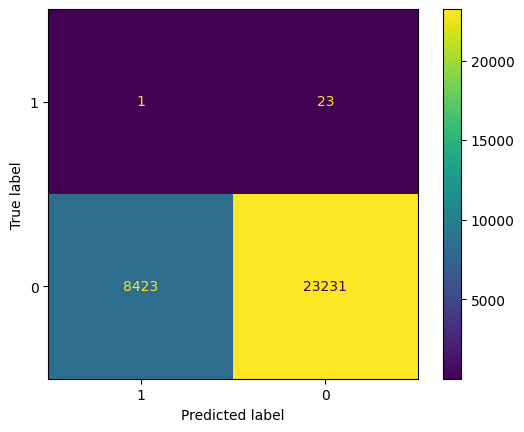

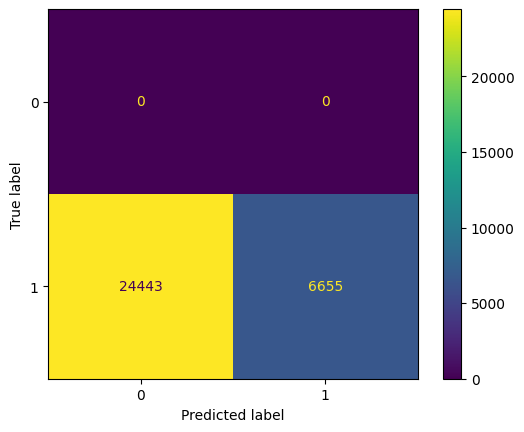

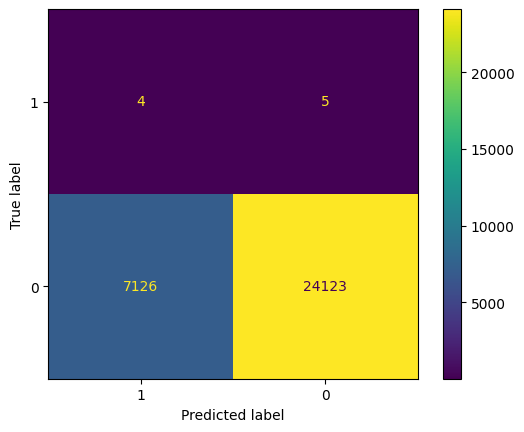

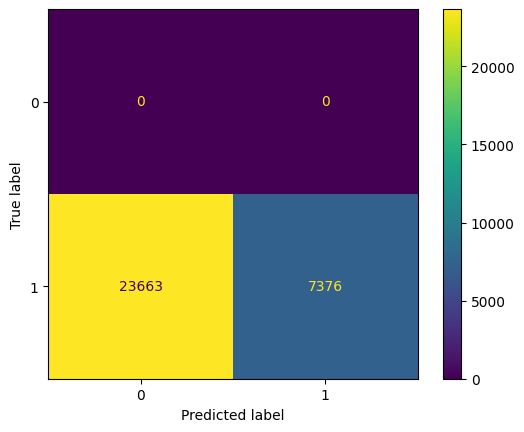

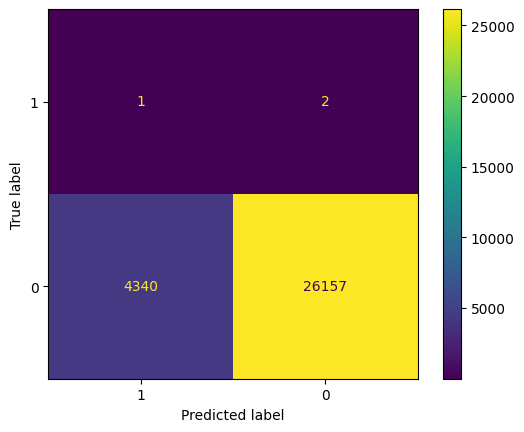

In [21]:
model_glb = pickle.load(open(f"{TUNING_PATH}/logistic_regression_v10/logistic_regression_v10_liblinear_split4.pkl", "rb"))
for train_index, test_index in zip(*spl.split_dataset(df_dt, tss_glb)):

    X_test=X[test_index]
    y_test=y[test_index]
    prediction=model_glb.predict(X_test)
    plot_confusion_matrix(model_glb, y_test, prediction)

In [23]:
logistic_regression_custom_cv(X=X, y=y, n_splits=5, min_split=3, max_split=5, class_weight='balanced')

START AT: 2023-04-26 19:32:44.638051
Split 3: 2023-04-26 19:32:53.233418


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic_regression_v11_split3: 0.5295924243393691
Split 4: 2023-04-26 19:33:18.756254


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic_regression_v11_split4: 0.5392570636940623
Split 5: 2023-04-26 19:33:47.952207
logistic_regression_v11_split5: 0.5518032786885246
FINISH: 2023-04-26 19:34:27.079974


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
logistic_regression_custom_cv(X=X, y=y, n_splits=5, min_split=3, max_split=5, class_weight='balanced', solver='saga', penalty='l2', warm_start=True)

START AT: 2023-04-26 20:08:17.141160
Split 3: 2023-04-26 20:08:24.299608


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


logistic_regression_v11_split3: 0.5510589289141979
Split 4: 2023-04-26 20:09:52.400298


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


logistic_regression_v11_split4: 0.59595992138922
Split 5: 2023-04-26 20:11:46.413332
logistic_regression_v11_split5: 0.5777704918032787
FINISH: 2023-04-26 20:14:14.478805


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
split_glb=1
for train_index, test_index in zip(*spl.split_dataset(df_dt, tss_glb)):
    #X_train=X[train_index]
    #X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    print(f"Split {split_glb}")
    print(f"Train data total alert time: {y_train.sum()}/{y_train.size}")
    print(f"Test data total alert time: {y_test.sum()}/{y_test.size}")
    split_glb+=1

Split 1
Train data total alert time: 14860/36142
Test data total alert time: 8424/31678
Split 2
Train data total alert time: 23284/67820
Test data total alert time: 6655/31098
Split 3
Train data total alert time: 29939/98918
Test data total alert time: 7130/31258
Split 4
Train data total alert time: 37069/130176
Test data total alert time: 7376/31039
Split 5
Train data total alert time: 44445/161215
Test data total alert time: 4341/30500


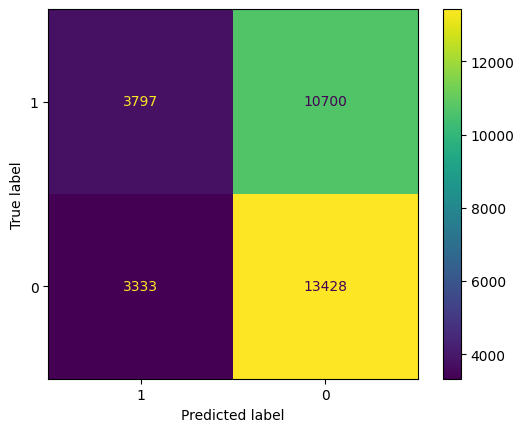

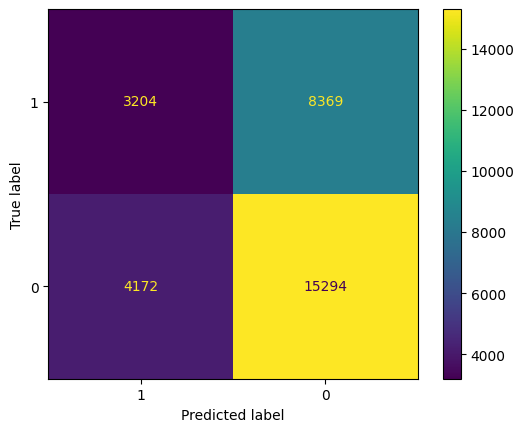

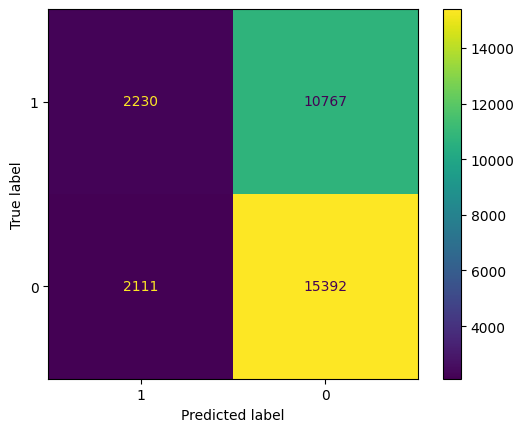

In [20]:
split_glb=1

for train_index, test_index in zip(*spl.split_dataset(df_dt, tss_glb)):
    if(split_glb<3):
        split_glb+=1
        continue
    model_glb = pickle.load(open(f"{TUNING_PATH}/logistic_regression_v11/logistic_regression_v11_saga_split{split_glb}.pkl", "rb"))
    X_test=X[test_index]
    y_test=y[test_index]
    prediction=model_glb.predict(X_test)
    plot_confusion_matrix(model_glb, y_test, prediction)
    split_glb+=1